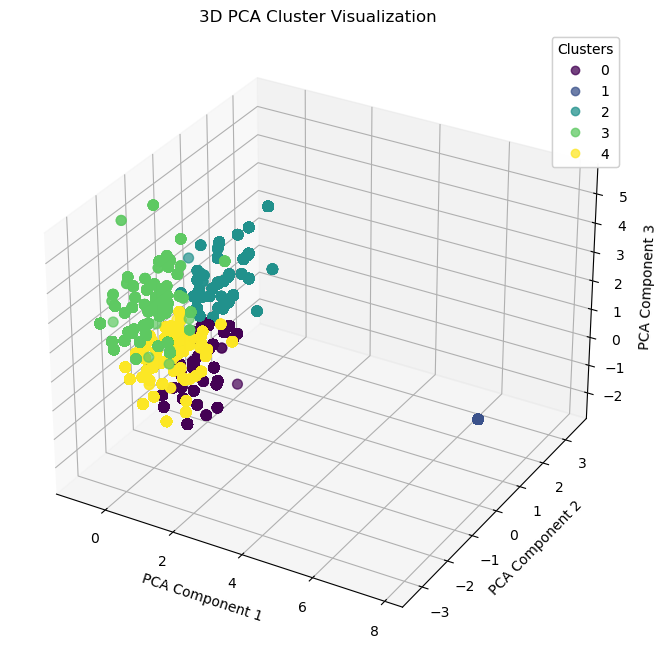

In [1]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Step 1: Load data in chunks and optimize data types (as previously shown)
file_path = 'cleanedData1.csv'  # Replace with the path to your file
columns_to_load = ['psyte_householdIncomeVariable.description', 'psyte_propertyValueVariable.description', 'psyte_propertyTenureVariable.description', 'psyte_urbanRuralVariable.description']  # Specify necessary columns only
chunk_size = 50000
data_chunks = []

for chunk in pd.read_csv(file_path, usecols=columns_to_load, chunksize=chunk_size, low_memory=False):
    # Optimize data types within each chunk
    for col in chunk.select_dtypes(include=['float64']).columns:
        chunk[col] = chunk[col].astype('float32')
    for col in chunk.select_dtypes(include=['int64']).columns:
        chunk[col] = chunk[col].astype('int32')
    for col in chunk.select_dtypes(include=['object']).columns:
        chunk[col] = chunk[col].astype('category')
    data_chunks.append(chunk)

df = pd.concat(data_chunks, ignore_index=True)

# Step 2: Encode categorical columns
categorical_columns = df.select_dtypes(include=['category', 'object']).columns
df_encoded = pd.get_dummies(df, columns=categorical_columns, drop_first=True)

# Step 3: Standardize the data
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_encoded)

# Step 4: Apply PCA for dimensionality reduction to 3 components
pca = PCA(n_components=3)
df_pca = pca.fit_transform(df_scaled)

# Step 5: Perform KMeans Clustering
kmeans = KMeans(n_clusters=5, random_state=42)
clusters = kmeans.fit_predict(df_pca)
df['Cluster'] = clusters  # Add clusters to the original DataFrame

# Step 6: 3D Visualization of the clusters
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(df_pca[:, 0], df_pca[:, 1], df_pca[:, 2], c=clusters, cmap='viridis', s=50, alpha=0.7)
ax.set_xlabel("PCA Component 1")
ax.set_ylabel("PCA Component 2")
ax.set_zlabel("PCA Component 3")
ax.set_title("3D PCA Cluster Visualization")
legend1 = ax.legend(*scatter.legend_elements(), title="Clusters")
ax.add_artist(legend1)
plt.show()